## 非ユニタリー系

### 時間発展

散乱問題等で吸収の効果，すなわち特定の領域に存在している波動関数の存在確率を減衰(もしくはゼロ)にしたいと考える場合がある．


簡単のため $0<q<0.2$の領域に到達した波動関数の存在確率をゼロにする作用素$\hat{P}$を考える．
つまり
$$
\hat{P} = \begin{cases}
0, \quad (0<q<0.2)\\
1, \quad (else)
\end{cases}
$$
として，$\hat{U}^{(o)}=\hat{P}\hat{U}$による時間発展を考える．

In [2]:
# 次の命令は無視して下さい
%matplotlib inline

/home/hanada/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


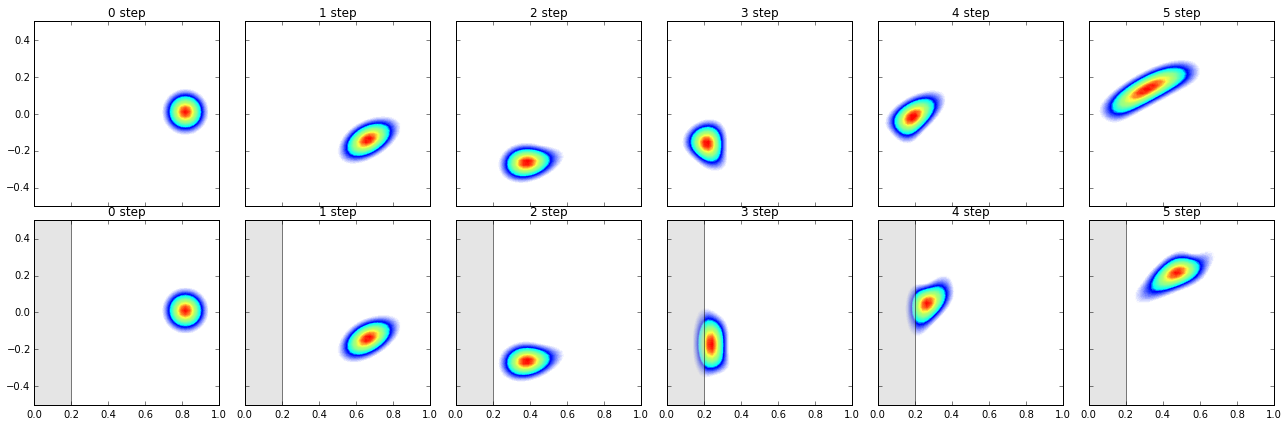

In [33]:
import SimpleQmap as sq
import numpy as np
import matplotlib.pyplot as plt

dim = 50
k = 1
qmin, qmax = 0, 1
pmin, pmax = -0.5,0.5

tmax = 6
cmap = sq.StandardMap(k=k)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = sq.Qmap(cmap, dim, domain) # defines the quantum system
state = qmap.getState().cs(0.8,0.0) 
qmap.setInit(state) # set intial condition

fig, axs = plt.subplots(2,6,figsize=(6*3,3*2),sharex=True,sharey=True)

## ---- closed system ----
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    axs[0][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
    axs[0][i].set_title("%d step" % i)

    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>

## ------ open system -------
state = qmap.getState().cs(0.8,0.0) 
qmap.setInit(state) # set intial condition

abs_border = 0.2
abs_index = state.x[0] < abs_border
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    axs[1][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
    axs[1][i].set_title("%d step" % i)
    axs[1][i].axvspan(0, abs_border, facecolor='0.8', alpha=0.5)
    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>
    state = qmap.getOut() # return | phi_1>
    state[abs_index] = 0
    qmap.setInit(state)
    
fig.tight_layout(h_pad=0)
plt.show()

吸収によって波動関数のノルムが1より小さくなっていくことに注意して下さい．
上記例題では定義していませんが，$q$ -表示の吸収ポテンシャルは階段関数です．陽的に定義すると．

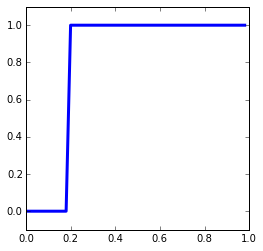

In [40]:
def step_abs(x,border):
    return np.array([0 if xx < border else 1 for xx in x])

absfunc = step_abs(state.x[0], abs_border)
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(state.x[0],absfunc,"-",lw=3)
ax.set_ylim(-0.1,1.1)
plt.show()

波動は微分が不連続である点に触れると回折が生じるため，吸収をなめらかに行いたいと思う事も有る用のような場合は以下の様に自作すれば良い．

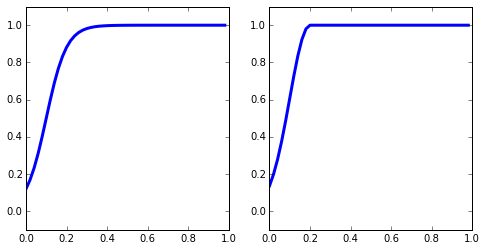

In [94]:
def tanh_abs(x,x_c,beta):
    xx = beta*(x-x_c)
    return (np.tanh(xx)+1)/2

def exp_abs(x,x_c,beta,alpha):
    xx = (x - x_c)*beta
    theta0= (1-np.tanh(xx))/2
    return np.exp(-xx**2*theta0/alpha)

fig, axs = plt.subplots(1,2,figsize=(8,4))

abs_border = 0.1
smoothness = 10
absfunc = tanh_abs(state.x[0], abs_border,smoothness)
axs[0].plot(state.x[0],absfunc,"-",lw=3)
axs[0].set_ylim(-0.1,1.1)

abs_border = 0.2
beta,alpha = 500,5000
absfunc = exp_abs(state.x[0], abs_border,beta, alpha)
axs[1].plot(state.x[0],absfunc,"-",lw=3)
axs[1].set_ylim(-0.1,1.1)

plt.show()

/home/hanada/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


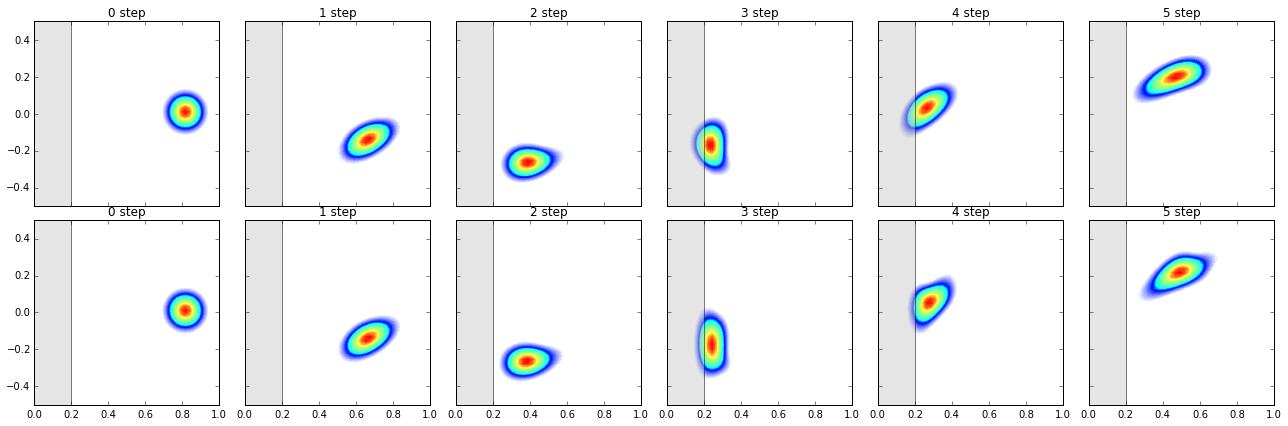

In [100]:
fig, axs = plt.subplots(2,6,figsize=(6*3,3*2),sharex=True,sharey=True)

# ---- tanh case ----

# -- soft absorber
state = qmap.getState().cs(0.8,0.0) 
qmap.setInit(state) # set intial condition
abs_border = 0.2
beta = 10
absfunc = tanh_abs(state.x[0], abs_border,beta)
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    axs[0][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
    axs[0][i].set_title("%d step" % i)
    axs[0][i].axvspan(0, abs_border, facecolor='0.8', alpha=0.5)
    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>
    state = qmap.getOut() # return | phi_1>
    state = absfunc*state
    qmap.setInit(state)

## -- sharp absorber
    
state = qmap.getState().cs(0.8,0.0) 
qmap.setInit(state) # set intial condition
abs_border = 0.2
beta = 100
absfunc = tanh_abs(state.x[0], abs_border,beta)
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    axs[1][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
    axs[1][i].set_title("%d step" % i)
    axs[1][i].axvspan(0, abs_border, facecolor='0.8', alpha=0.5)
    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>
    state = qmap.getOut() # return | phi_1>
    state = absfunc*state
    qmap.setInit(state)

    
fig.tight_layout(h_pad=0)
plt.show()

### 固有状態

次に $\hat{U}^{(o)}$の固有値問題を考える． まず$\hat{U}^{(o)}$の行列要素を求める必要があるがSimpleQmapではそこまで提供していないので，Qmapのクラスを継承しoperateのメソットを上書きする必要が有る．具体的には以下の通りである．

In [ ]:
import SimpleQmap as sq
import matplotlib.pyplot as plt
import numpy as np

class OpenQmap(sq.Qmap):
    def operate(self):
                pvec = numpy.fft.fft(self.operator[0]*self.stateIn)
        qvec = numpy.fft.ifft(self.operator[1]*pvec)
        self.stateOut = State(self.scaleinfo, qvec)
        